## Notebook to explore downloaded metadata from Mapillary

In [1]:
from streetscapes.streetview import SVWorkspace
from streetscapes.utils import get_env
import contextily

In [2]:
ws = SVWorkspace("amsterdam")
metadata = ws.load_metadata()
metadata

id  altitude  atomic_scale  camera_type    captured_at  \
0     663413764651658  7.035341      0.976458  perspective  1635089189000   
1    3865419186838917  4.910000      0.998205  perspective  1565522021000   
2    5139654559435284 -4.026667      1.022048  perspective  1584808375000   
3     107489668250183 -1.030200      0.999098  perspective  1624364338476   
4     264241782079970  0.000000      0.992372  perspective  1474376360000   
..                ...       ...           ...          ...            ...   
134   224598779432057  5.277500      1.001628  perspective  1498494359000   
135   925399894920565  5.930000      1.074802  perspective  1498494161000   
136   134820245249795  5.670000      1.074271  perspective  1498494141000   
137  3944970478924443  5.710000      1.000000  perspective  1498494119000   
138  2930407743871285  6.400000      1.075280  perspective  1498494165000   

     compass_angle  computed_altitude  computed_compass_angle  \
0       172.713369           6.239476              146.985504   
1       109.912196           1.770681              111.739395   
2       157.187633           2.017913              152.754664   
3       140.709045           2.017469              134.669351   
4       174.753647           1.911718              176.768253   
..             ...                ...                     ...   
134      66.000000           2.388055               70.892311   
135     160.000000           3.992881              178.039041   
136     133.000000           3.536386              145.839174   
137      78.000000           2.000005               76.902068   
138     163.000000           3.848102              173.961254   

                                     computed_rotation  exif_orientation  ...  \
0    [0.48913001779865, -2.1221641908862, 1.6183096...                 1  ...   
1    [1.0182692437772, -1.4039376546972, 1.56945506...                 1  ...   
2    [0.50810461415046, -1.9175127626689, 2.0188946...                 1  ...   
3    [0.74030280773416, -1.7680286974945, 1.7483223...                 1  ...   
4    [0.021984974927383, -2.1224126301495, 2.224884...                 1  ...   
..                                                 ...               ...  ...   
134  [1.2942997517974, -0.96887606632266, 0.9347106...                 1  ...   
135  [0.056776920873752, -2.1967425668962, 2.228411...                 1  ...   
136  [0.44981395791812, -1.8385046911544, 1.8331127...                 1  ...   
137  [1.2250898090731, -1.0978678100119, 0.95228469...                 1  ...   
138  [0.18663924786195, -2.1697167886085, 2.2252989...                 1  ...   

                                    thumb_original_url  \
0    https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
1    https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
2    https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
3    https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
4    https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
..                                                 ...   
134  https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
135  https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
136  https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
137  https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
138  https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   

                       sequence width computed_geometry.type  \
0        Clvye4sKw8ijVUANHYng0O  4000                  Point   
1        IJgBYONkiK2RKaKrwQhrIA  4000                  Point   
2    pQzH4Hix0fRvpIDs6GX-7w_v00  4000                  Point   
3        UKHQWRhmDVkCzGAL70ypdE  4032                  Point   
4        UkvPJcqWHD-ywTA76Tct2Q  4608                  Point   
..                          ...   ...                    ...   
134      Q-aybFSAXHET6HGo9YQQeA  4000                  Point   
135      Q-aybFSAXHET6HGo9YQQeA  4000                  Point   
136      Q-aybFSAXHET6HGo9YQQeA  4000                  Point   
137

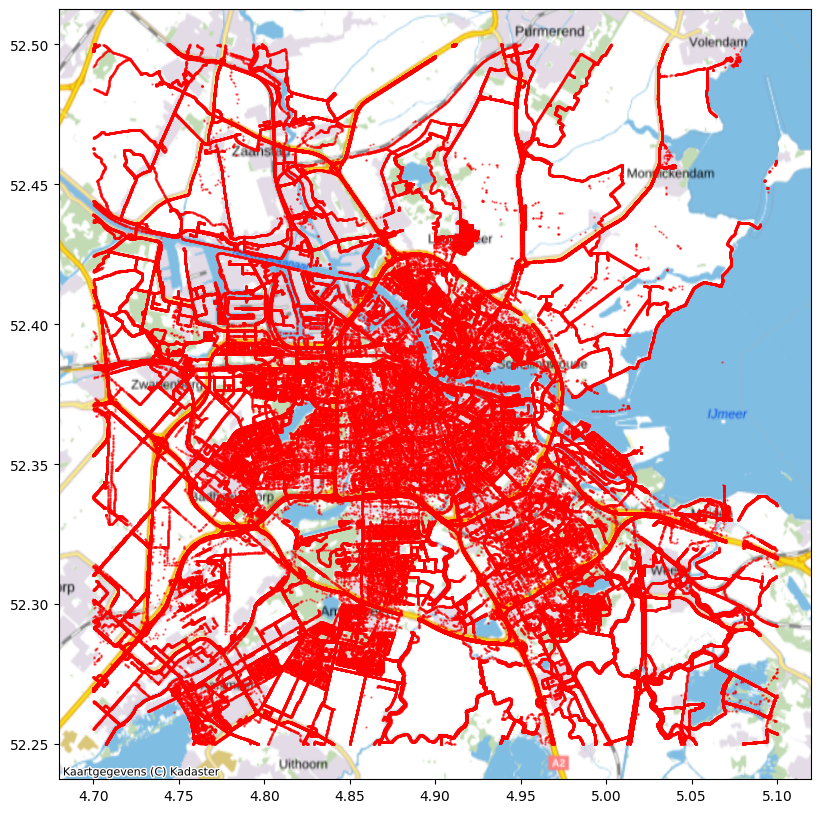

In [3]:
ax = metadata.plot(color="red", markersize=0.5, figsize=(10, 10), alpha=0.5)
contextily.add_basemap(
    ax, crs=metadata.crs, source=contextily.providers.nlmaps.standaard
)

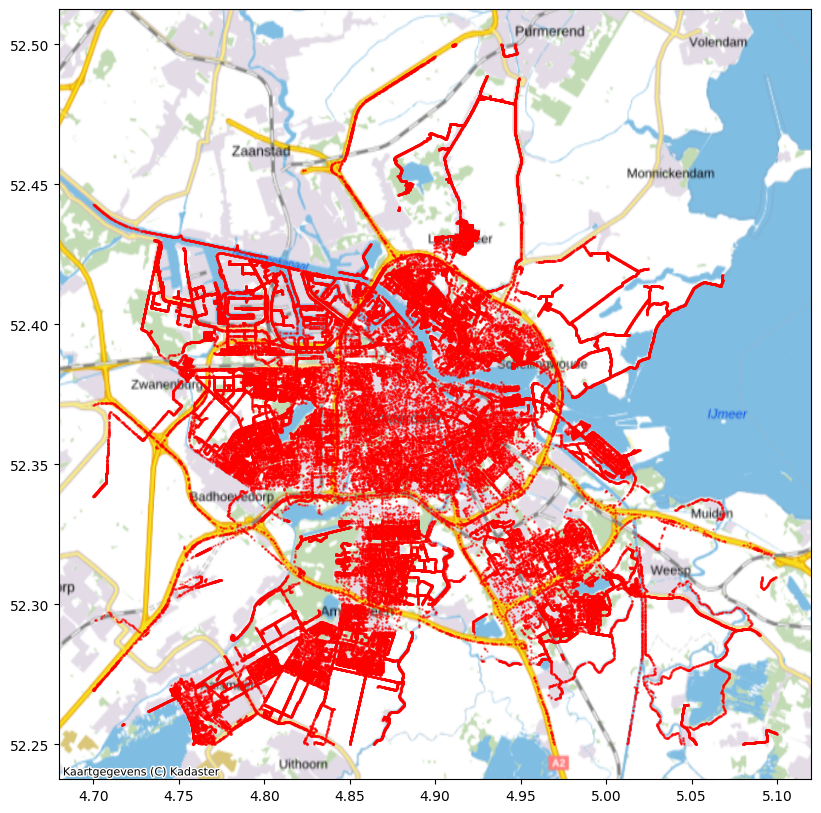

In [4]:
ax = metadata.query('is_pano').plot(color="red", markersize=0.5, figsize=(10, 10), alpha=0.5)
contextily.add_basemap(
    ax, crs=metadata.crs, source=contextily.providers.nlmaps.standaard
)

In [5]:
metadata.columns

Index(['id', 'altitude', 'atomic_scale', 'camera_type', 'captured_at',
       'compass_angle', 'computed_altitude', 'computed_compass_angle',
       'computed_rotation', 'exif_orientation', 'height', 'is_pano', 'make',
       'model', 'thumb_256_url', 'thumb_1024_url', 'thumb_2048_url',
       'thumb_original_url', 'sequence', 'width', 'computed_geometry.type',
       'computed_geometry.coordinates', 'geometry.type',
       'geometry.coordinates', 'lon', 'lat', 'geometry'],
      dtype='object')

In [6]:
# Convert time stamp to datetime or str

from datetime import datetime, timezone

metadata['captured_at_dt'] = metadata['captured_at'].apply(
    lambda ms: datetime.fromtimestamp(ms / 1000, tz=timezone.utc)
)
metadata['captured_at_str'] = metadata['captured_at_dt'].apply(
    lambda dt: dt.strftime('%Y%m%d%H%M%S')
)

In [7]:
metadata

id  altitude  atomic_scale  camera_type    captured_at  \
0     663413764651658  7.035341      0.976458  perspective  1635089189000   
1    3865419186838917  4.910000      0.998205  perspective  1565522021000   
2    5139654559435284 -4.026667      1.022048  perspective  1584808375000   
3     107489668250183 -1.030200      0.999098  perspective  1624364338476   
4     264241782079970  0.000000      0.992372  perspective  1474376360000   
..                ...       ...           ...          ...            ...   
134   224598779432057  5.277500      1.001628  perspective  1498494359000   
135   925399894920565  5.930000      1.074802  perspective  1498494161000   
136   134820245249795  5.670000      1.074271  perspective  1498494141000   
137  3944970478924443  5.710000      1.000000  perspective  1498494119000   
138  2930407743871285  6.400000      1.075280  perspective  1498494165000   

     compass_angle  computed_altitude  computed_compass_angle  \
0       172.713369           6.239476              146.985504   
1       109.912196           1.770681              111.739395   
2       157.187633           2.017913              152.754664   
3       140.709045           2.017469              134.669351   
4       174.753647           1.911718              176.768253   
..             ...                ...                     ...   
134      66.000000           2.388055               70.892311   
135     160.000000           3.992881              178.039041   
136     133.000000           3.536386              145.839174   
137      78.000000           2.000005               76.902068   
138     163.000000           3.848102              173.961254   

                                     computed_rotation  exif_orientation  ...  \
0    [0.48913001779865, -2.1221641908862, 1.6183096...                 1  ...   
1    [1.0182692437772, -1.4039376546972, 1.56945506...                 1  ...   
2    [0.50810461415046, -1.9175127626689, 2.0188946...                 1  ...   
3    [0.74030280773416, -1.7680286974945, 1.7483223...                 1  ...   
4    [0.021984974927383, -2.1224126301495, 2.224884...                 1  ...   
..                                                 ...               ...  ...   
134  [1.2942997517974, -0.96887606632266, 0.9347106...                 1  ...   
135  [0.056776920873752, -2.1967425668962, 2.228411...                 1  ...   
136  [0.44981395791812, -1.8385046911544, 1.8331127...                 1  ...   
137  [1.2250898090731, -1.0978678100119, 0.95228469...                 1  ...   
138  [0.18663924786195, -2.1697167886085, 2.2252989...                 1  ...   

     width  computed_geometry.type       computed_geometry.coordinates  \
0     4000                   Point  [5.0485453930774, 52.253861781945]   
1     4000                   Point  [5.0466734623748, 52.252818185238]   
2     4000                   Point  [5.0488442262364, 52.256431015497]   
3     4032                   Point  [5.0440796286181, 52.256752616836]   
4     4608                   Point  [5.0434452756108, 52.254778372568]   
..     ...                     ...                                 ...   
134   4000                   Point   [4.9062046976642, 52.44337135099]   
135   4000                   Point  [4.9041376068028, 52.446557851944]   
136   4000                   Point  [4.9033789828842, 52.447657817462]   
137   4000                   Point  [4.9016230087105, 52.448030000809]   
138   4000                   Point  [4.9041269616969, 52.446494777058]   

    geometry.type                geometry.coordinates       lon        lat  \
0           Point  [5.0486141296667, 52.253883023333]  5.048614  52.253883   
1           Point        [5.0466802809, 52.252811864]  5.046680  52.252812   
2           Point       [5.0487897545, 52.2564672958]  5.048790  52.256467   
3           Point           [5.04409598, 52.25671284]  5.044096  52.256713   
4           Point                [5.043455, 52.25478]  5.0434

In [8]:
# Filter for panoramic images facing northwest and captured in 2020's
# metadata.query("is_pano").query("compass_angle>315").query('captured_at_str.str.startswith("202")')

# Or a combined query
pano = "is_pano"
northwest = "compass_angle > 315"
twenties = 'captured_at_str.str.startswith("202")'
combined_query = "&".join([pano, northwest, twenties])

subset = metadata.query(combined_query)
subset

id  altitude  atomic_scale camera_type    captured_at  \
5     611261891337289 -9.375554      0.989293   spherical  1734081952001   
23   2435208886815356 -9.214410      1.006176   spherical  1734081936252   
58   8872783122837444 -9.384610      1.006449   spherical  1734081929712   
91    887786363525771 -9.566394      1.006479   spherical  1734081928344   
95   1634804564139018 -9.297485      0.995392   spherical  1734081917066   
..                ...       ...           ...         ...            ...   
915  1659659114836303 -8.194447           NaN   spherical  1718904488339   
932  1695101154641257 -8.468485           NaN   spherical  1718904485937   
985  1175759723699535 -4.942090           NaN   spherical  1718904512230   
986  2312894822381347 -3.954110           NaN   spherical  1718904515400   
997  1113206916406323 -8.219701           NaN   spherical  1718904487939   

     compass_angle  computed_altitude  computed_compass_angle  \
5       315.521183           0.766599              309.491678   
23      335.339353           1.279265              329.431587   
58      356.035648           1.590339              352.842098   
91      352.759174           1.664549              357.351461   
95      325.586541           2.474692              319.789472   
..             ...                ...                     ...   
915     347.304436                NaN                     NaN   
932     347.205256                NaN                     NaN   
985     347.247606                NaN                     NaN   
986     344.628020                NaN                     NaN   
997     346.872791                NaN                     NaN   

                                     computed_rotation  exif_orientation  ...  \
5    [1.4883247720401, 0.72902701684215, -0.6538698...                 1  ...   
23   [1.5725624161816, 0.46485944215061, -0.3778254...                 1  ...   
58   [1.6192359350142, 0.13258771694876, -0.0665533...                 1  ...   
91   [1.6145517848268, 0.053004069582522, -0.020714...                 1  ...   
95   [1.5438821305995, 0.53474126447212, -0.5690741...                 1  ...   
..                                                 ...               ...  ...   
915                                               None                 1  ...   
932                                               None                 1  ...   
985                                               None                 1  ...   
986                                               None                 1  ...   
997                                               None                 1  ...   

     width  computed_geometry.type       computed_geometry.coordinates  \
5     4096                   Point  [5.0466764871822, 52.255759265512]   
23    4096                   Point  [5.0482085906386, 52.254470454496]   
58    4096                   Point  [5.0485017556298, 52.253841361381]   
91    4096                   Point  [5.0485079272044, 52.253704943881]   
95    4096                   Point  [5.0485520219192, 52.252647280763]   
..     ...                     ...                                 ...   
915   4096                    None                                None   
932   4096                    None                                None   
985   4096                    None                                None   
986   4096                    None                                None   
997   4096                    None                                None   

    geometry.type                geometry.coordinates       lon        lat  \
5           Point  [5.0466666015082, 52.255766879579]  5.046667  52.255767   
23          Point  [5.0482125466667, 52.254464137778]  5.048213  52.254464   
58          Point  [5.0485068780769, 52.253836243654]  5.048507  52.253836   
91          Point  [5.0485167688033, 52.253698032129]  5.048517  52.253698   
95          Point  [5.0485614232983, 52.252645130244]  5.048561  52.25264

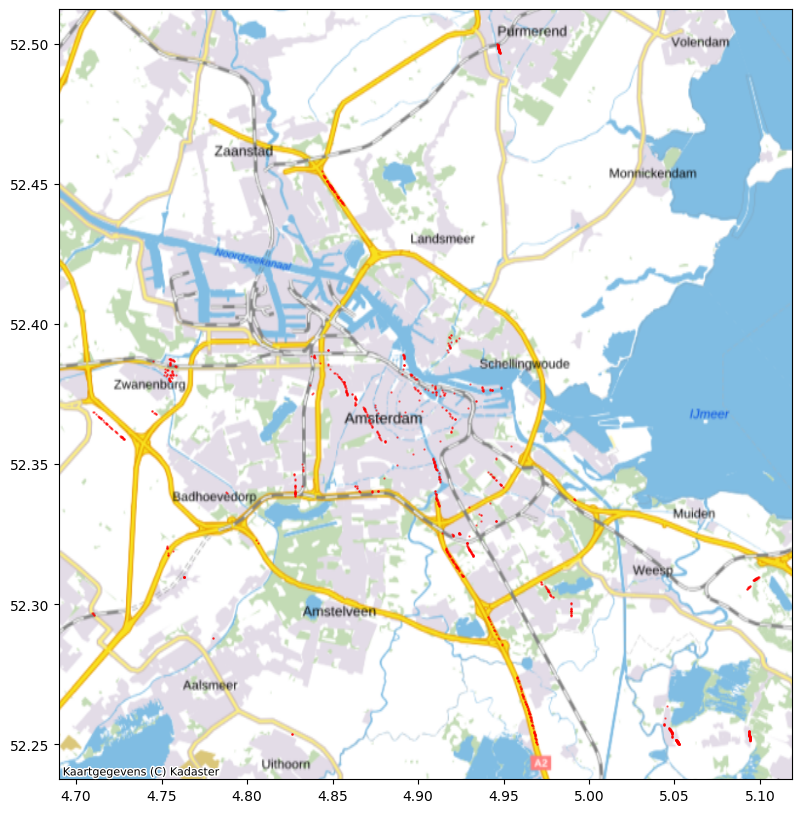

In [9]:
ax = subset.plot(color="red", markersize=0.5, figsize=(10, 10), alpha=0.5)
contextily.add_basemap(
    ax, crs=subset.crs, source=contextily.providers.nlmaps.standaard
)

22986 images out of 644809 available locally.


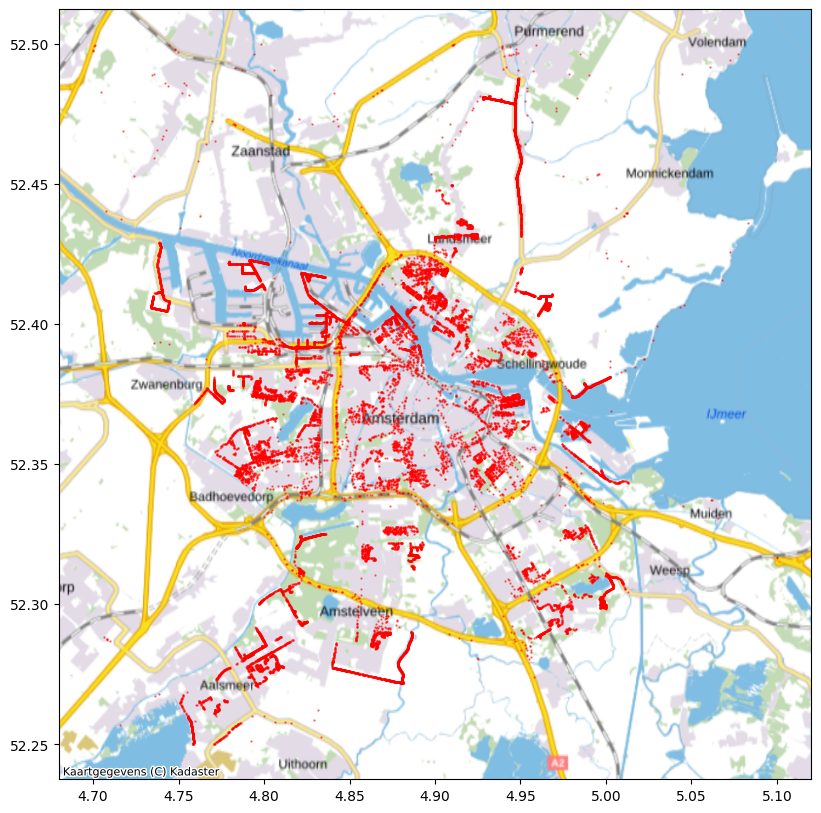

In [18]:
from pathlib import Path

image_dir = Path(get_env('DATA_HOME')) / 'sources' / 'mapillary' / 'images'
existing_ids = {p.stem for p in image_dir.glob('*.jpeg')}
metadata['is_local'] = metadata['id'].isin(existing_ids)

local_images = metadata.query('is_local')
print(f"{len(local_images)} images out of {len(metadata)} available locally.")

ax = local_images.plot(color="red", markersize=0.5, figsize=(10, 10), alpha=0.5)
contextily.add_basemap(
    ax, crs=subset.crs, source=contextily.providers.nlmaps.standaard
)

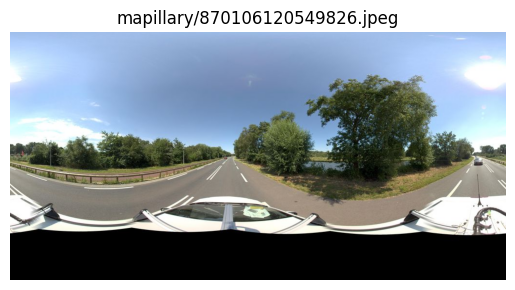

In [44]:
from pathlib import Path
from matplotlib import pyplot as plt
from PIL import Image

def show_image(id: str, source: str):
    image_dir = Path(get_env('DATA_HOME')) / 'sources' / source / 'images'
    image_path = image_dir / f"{id}.jpeg"

    if not image_path.exists():
        print(f"Image not found: {image_path}")
        return

    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{source}/{id}.jpeg")
    plt.show()

# Example usage:
sample_image = local_images['id'].sample(1).item()
show_image(sample_image, source='mapillary')


In [ ]:
wageningen = SVWorkspace("wageningen")
metadata = wageningen.load_metadata()
metadata

id   altitude  atomic_scale  camera_type    captured_at  \
0   1020859665219339  13.250200      1.000000  perspective  1662291443255   
1    801096237485427  54.000000      1.051771  perspective  1464886808028   
2    307946467559766  53.000000      1.051748  perspective  1464886809297   
3    813228192612737  53.000000      1.051748  perspective  1464886808665   
0   2386974978107465  12.999403      0.971814  perspective  1662291441755   
..               ...        ...           ...          ...            ...   
5   1833513306821791   9.000000      1.000000  perspective  1486452660024   
6   1210554012700336  20.293727      1.000000  perspective  1560925777263   
7   1451174838558570  18.787563      1.000000  perspective  1530590312887   
8   1771068259721253  25.868740      1.000000  perspective  1527826923018   
9    127438342708102   9.000000      1.000000  perspective  1486452661953   

    compass_angle  computed_altitude  computed_compass_angle  \
0      256.459347           2.000000              256.459347   
1       75.599668           2.097831               67.875615   
2       78.126668           1.854493               67.780690   
3       78.126668           2.041967               67.815460   
0      255.907692           1.972876              257.956951   
..            ...                ...                     ...   
5      280.525100           1.999832              284.694578   
6      278.185913           2.000000              275.883760   
7      346.246582           2.000000              343.604252   
8      350.212891           2.000000              349.956651   
9      279.423700           2.000001              279.028165   

                                    computed_rotation  exif_orientation  ...  \
0   [1.0880059997002, 1.3811365545702, -1.38113655...                 1  ...   
1   [1.1886718082539, -0.77367251057698, 1.0182177...                 1  ...   
2   [1.1896724296061, -0.77297897083761, 1.0166012...                 1  ...   
3   [1.1898188562088, -0.77367512281543, 1.0168885...                 1  ...   
0   [1.1321795102283, 1.3937850383269, -1.34273145...                 1  ...   
..                                                ...               ...  ...   
5   [1.4316654535173, 1.0392336730926, -1.02399326...                 1  ...   
6   [1.3929093674131, 1.1902433946591, -1.11264239...                 1  ...   
7   [1.5675830507944, 0.21383796558652, -0.2358212...                 1  ...   
8   [1.5644077115984, 0.094424021633368, -0.180995...                 1  ...   
9   [1.3130336092, 1.1054643197238, -1.0893252983113]                 1  ...   

                                   thumb_original_url  \
0   https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
1   https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
2   https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
3   https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
0   https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
..                                                ...   
5   https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
6   https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
7   https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
8   https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   
9   https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...   

                                sequence width computed_geometry.type  \
0                 tZp4rinoKF9DHUyJGfl2dv  1920                  Point   
1                 stb2xdloi52aunsgxws1pv  4160                  Point   
2                 stb2xdloi52aunsgxws1pv  4160                  Point   
3                 stb2xdloi52aunsgxws1pv  4160                  Point   
0                 tZp4rinoKF9DHUyJGfl2dv  1920                  Point   
..                                   ...   ...                    ...   
5                 D_y8OPHDXFVG8IYWV0n6kg  3264                  Point   
6                 4ruat5iug4rxdkg59575t9  4032                  Point   
7                 Jxe

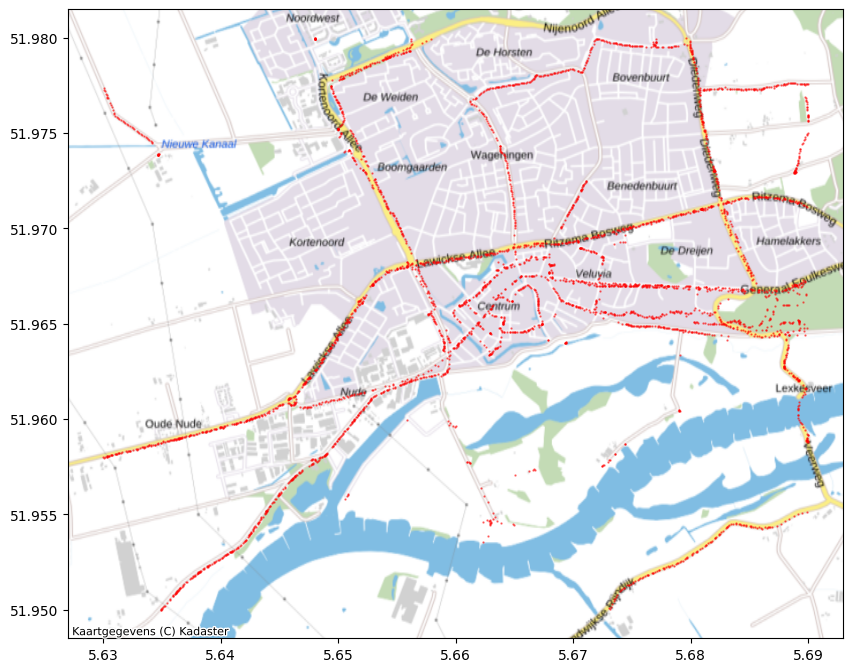

In [ ]:
ax = metadata.plot(color="red", markersize=0.5, figsize=(10, 10), alpha=0.5)
contextily.add_basemap(
    ax, crs=metadata.crs, source=contextily.providers.nlmaps.standaard
)